<a href="https://colab.research.google.com/github/PecaJosef/MPA-MLF-Pecka/blob/main/Ex_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

### 1.1 Generating dataset

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [ ]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [ ]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
no_training_epochs = 5

### 1.3 Data examination

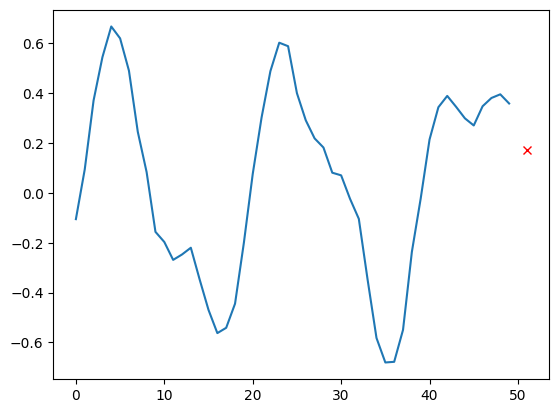

In [ ]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [ ]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [ ]:
model_linear.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155 (624.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104 (420.00 B)

In [ ]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2874 - mean_squared_error: 0.2874 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0068 - val_mean_squared_error: 0.0068


In [ ]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

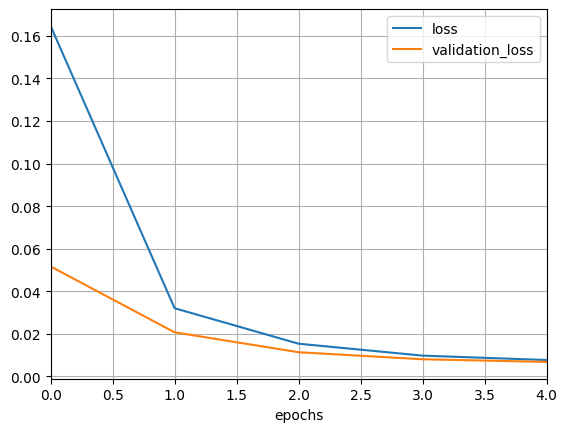

In [ ]:
plot_function(history_linear)

In [ ]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0068910131230950356
Test MSE:  0.0068910131230950356


### 1.5 Simple RNN Model

In [ ]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [ ]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


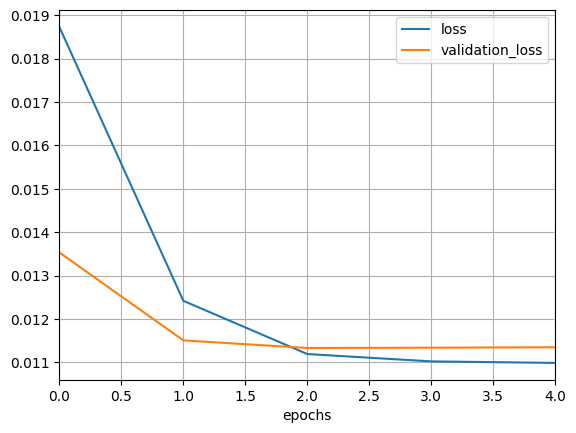

In [ ]:
plot_function(history_simple_rnn)

In [ ]:
score = model_simple_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.010621740482747555
Test MSE:  0.010621740482747555


### 1.5 Deep RNN Model

In [ ]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [ ]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


In [ ]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0031113233417272568
Test MSE:  0.0031113233417272568


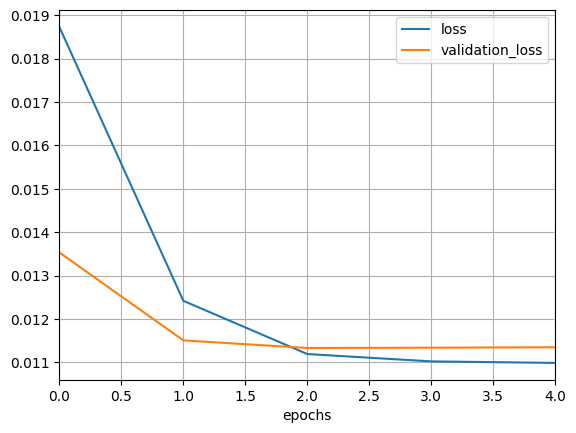

In [ ]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.2 - Dataset examination

In [ ]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [ ]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant"

In [ ]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [ ]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [ ]:
optimizer = Adam(learning_rate = 0.001)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5005 - loss: 0.7192 - val_accuracy: 0.4794 - val_loss: 0.6985
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5075 - loss: 0.6959 - val_accuracy: 0.5170 - val_loss: 0.6939
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5034 - loss: 0.6949 - val_accuracy: 0.5136 - val_loss: 0.6930
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4990 - loss: 0.6964 - val_accuracy: 0.5130 - val_loss: 0.6948
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4935 - loss: 0.6962 - val_accuracy: 0.5124 - val_loss: 0.6926


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6930127143859863
Test accuracy:  50.84800124168396 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

In [199]:
embed_size = 256
vocabulary_size = 10000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,input_shape=[None]),
    keras.layers.GRU(256, return_sequences=True), # Changed to LSTM
    keras.layers.LSTM(256), # Changed to LSTM
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [200]:
optimizer = Adam(learning_rate = 0.0005)

In [201]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [202]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.5191 - loss: 0.6907 - val_accuracy: 0.5062 - val_loss: 0.6924
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5968 - loss: 0.6286 - val_accuracy: 0.8436 - val_loss: 0.3639
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8955 - loss: 0.2607 - val_accuracy: 0.8644 - val_loss: 0.3284
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9465 - loss: 0.1614 - val_accuracy: 0.8500 - val_loss: 0.4119
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9707 - loss: 0.0931 - val_accuracy: 0.8496 - val_loss: 0.4452


In [203]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.48804134130477905
Test accuracy:  83.4280014038086 %
